# TRABALHO FINAL TEORIA MODERNA DO PORTFÓLIO - MARKOWITZ

        Neste trabalho, o objetivo é desenvolver um script baseado no modelo de Markowitz, uma teoria amplamente utilizada no campo das finanças e investimentos. O motivo para a criação desse script é a necessidade de otimizar a alocação de recursos em uma carteira de investimentos, levando em consideração a relação entre o risco e o retorno esperado de cada ativo.
        
        Utilizar a teoria de Markowitz é de extrema relevância para os investidores e gestores de carteiras, pois oferece uma abordagem sistemática e quantitativa para a seleção de ativos e a construção de portfólios. Além disso, a automatização desse processo por meio de programação permite uma análise mais rápida e eficiente de diferentes cenários, ajudando a tomar decisões embasadas em dados e melhorando os resultados dos investimentos.

In [1]:
#Importando Bibliotecas
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy.optimize import minimize
import matplotlib.ticker as mtick

C:\Users\mathe\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#Periodo de Análise 2016-2023
inicio = dt.date(2016, 1, 1)
final = dt.date(2023, 1, 1)

In [3]:
#Ativos Selecionados, e fechamento diário
lista_acoes = ["VALE3","ABEV3", "ETER3","MYPK3","SIMH3","ITSA4","BBDC3"]
lista_acoes = [acao + ".SA" for acao in lista_acoes]
precos = yf.download(lista_acoes, inicio, final)['Adj Close']
precos

[*********************100%***********************]  7 of 7 completed


,ABEV3.SA,BBDC3.SA,ETER3.SA,ITSA4.SA,MYPK3.SA,SIMH3.SA,VALE3.SA
Date,,,,,,,
2016-01-04,13.508918,6.898613,9.650032,2.995685,8.515961,NaN,8.238918
2016-01-05,13.720854,6.952359,9.699018,3.045613,8.411925,NaN,8.128547
2016-01-06,13.587413,6.829312,9.552061,3.072848,8.367339,NaN,7.531242
2016-01-07,13.226338,6.610555,9.405107,3.027457,8.397065,NaN,7.083261
2016-01-08,13.399027,6.596883,9.552061,3.027457,8.605132,NaN,6.843041
...,...,...,...,...,...,...,...
2022-12-23,14.620000,12.724828,10.516922,8.348847,11.627464,6.903888,84.465065
2022-12-26,14.520000,12.429566,10.318489,8.241810,11.715109,6.787038,85.238083
2022-12-27,14.520000,12.505764,10.050605,8.154234,11.413223,6.368326,87.273392


In [4]:
#Média Retorno dos Ativos
retornos = precos.pct_change().apply(lambda x: np.log(1+x)).dropna()
media_retornos = retornos.mean()
matriz_cov = retornos.cov()
media_retornos

ABEV3.SA    0.000436
BBDC3.SA   -0.000089
ETER3.SA    0.001208
ITSA4.SA    0.000378
MYPK3.SA   -0.000098
SIMH3.SA    0.000091
VALE3.SA    0.001165
dtype: float64

In [5]:
#Simulação de pesos da Carteira
numeros_carteiras = 10000
tabela_retornos_esperados = np.zeros(numeros_carteiras)
tabela_volatilidades_esperadas = np.zeros(numeros_carteiras)
tabela_sharpe = np.zeros(numeros_carteiras)
tabela_pesos = np.zeros((numeros_carteiras, len(lista_acoes)))

for k in range(numeros_carteiras):
    pesos = np.random.random(len(lista_acoes))
    pesos = pesos/np.sum(pesos)
    tabela_pesos[k, :] = pesos
    
    tabela_retornos_esperados[k] = np.sum(media_retornos * pesos * 252)
    tabela_volatilidades_esperadas[k] = np.sqrt(np.dot(pesos.T, np.dot(matriz_cov*252, pesos)))
    
    tabela_sharpe[k] = tabela_retornos_esperados[k]/tabela_volatilidades_esperadas[k]

In [6]:
#Pesos Ideais
indice_do_sharpe_maximo = tabela_sharpe.argmax()
tabela_pesos[indice_do_sharpe_maximo]

array([0.01990226, 0.00479656, 0.01178293, 0.16243476, 0.04454106,
       0.02673519, 0.72980724])

In [7]:
["VALE3","ABEV3", "ETER3","MYPK3","SIMH3","ITSA4","BBDC3"]

['VALE3', 'ABEV3', 'ETER3', 'MYPK3', 'SIMH3', 'ITSA4', 'BBDC3']

In [8]:
#Retorno Esperado
tabela_retornos_esperados_arit = np.exp(tabela_retornos_esperados) - 1

In [9]:
eixo_y_fronteira_eficiente = np.linspace(tabela_retornos_esperados_arit.min(),
                                         tabela_retornos_esperados_arit.max(),50)

def pegando_retorno(peso_teste):
    peso_teste = np.array(peso_teste)
    retorno = np.sum(media_retornos * peso_teste)* 252
    retorno = np.exp(retorno) - 1
    
    return retorno

def checando_soma_pesos(peso_teste):
    
    return np.sum(peso_teste) -1

def pegando_vol(peso_teste):
    peso_teste = np.array(peso_teste)
    vol = np.sqrt(np.dot(peso_teste.T, np.dot(matriz_cov*252, peso_teste)))
    
    return vol

peso_inicial = [1/len(lista_acoes)] * len(lista_acoes)
limites = tuple([(0,1) for ativo in lista_acoes])

eixo_x_fronteira_eficiente = []

for retorno_possivel in eixo_y_fronteira_eficiente:
    
    restricoes = ({'type':'eq','fun':checando_soma_pesos},
                 {'type':'eq','fun': lambda w:pegando_retorno(w) - retorno_possivel})
    result = minimize(pegando_vol, peso_inicial, method= 'SLSQP', bounds = limites,
                     constraints=restricoes)
    eixo_x_fronteira_eficiente.append(result['fun'])

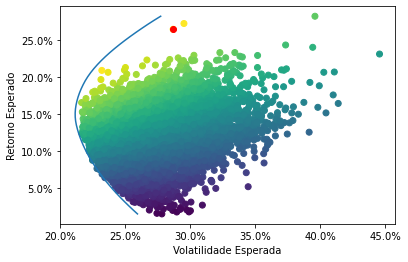

In [10]:
#Plotando Gráfico Markowitz, Fronteira de Eficiência
fig, ax = plt.subplots()

ax.scatter(tabela_volatilidades_esperadas, tabela_retornos_esperados_arit, c = tabela_sharpe)
plt.xlabel("Volatilidade Esperada")
plt.ylabel("Retorno Esperado")
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.scatter(tabela_volatilidades_esperadas[indice_do_sharpe_maximo],
          tabela_retornos_esperados_arit[indice_do_sharpe_maximo], c = "red")
ax.plot(eixo_x_fronteira_eficiente, eixo_y_fronteira_eficiente)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')

plt.show()

In [ ]:
#O peso ideal encontrado nesse modelo, não se encontra na fronteira eficiente. Entretanto demonstra o melhor retorno por risco.